In [1]:
#Copyright © 2019 by Castrow, L.L.C.

#All rights reserved. 
#No part of this publication may be reproduced, distributed, or transmitted in any form or by any means, 
#including photocopying, recording, or other electronic or mechanical methods.

#WARNING: Used without permission, this code could cause catrastophic events to occur.
#         You have been warned.

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
#populate data frames
results = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
stations_df = pd.DataFrame(results, columns=['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
#stations_df

results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
measurements_df = pd.DataFrame(results, columns=['id', 'station', 'date', 'prcp', 'tobs'])
#measurements_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Climate Analysis

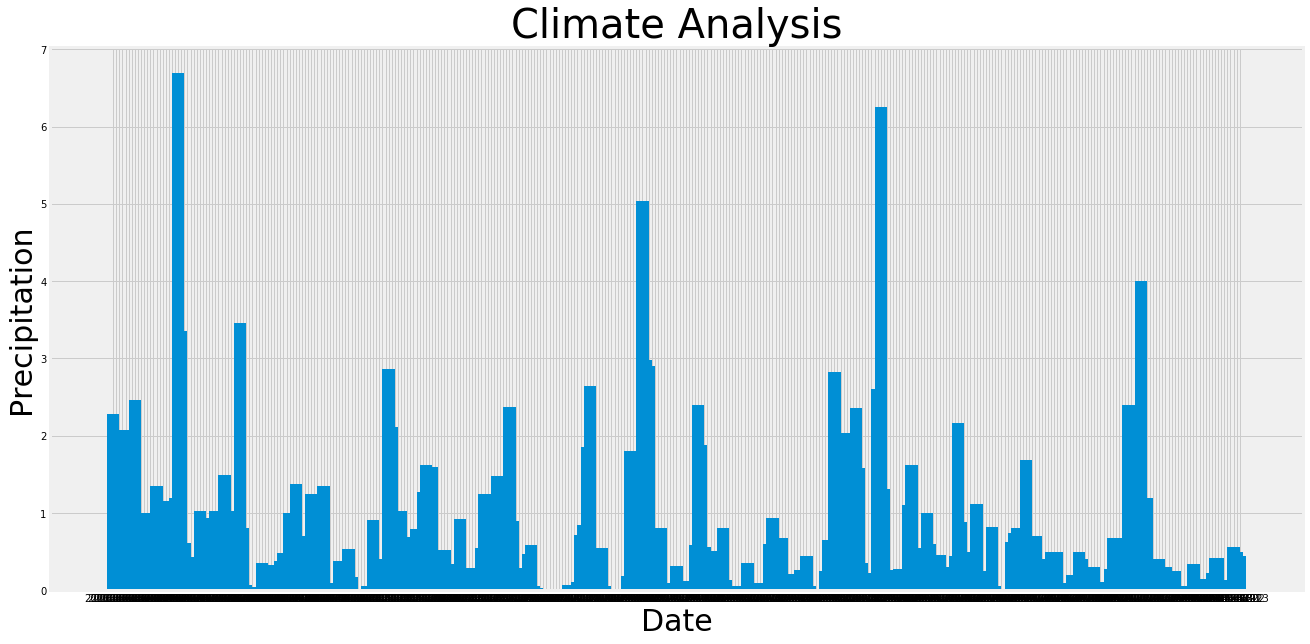

In [19]:
#LEFT OFF HERE!
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sql_statement  = "select * from Measurement m "
sql_statement += "where date > (select Date(Max(date), '-1 year') from Measurement m) "
sql_statement += "order by date"
s = text(sql_statement)
rows = session.execute(s).fetchall()

#Last_year_measurements_df
Last_year_measurements_df = pd.DataFrame(rows, columns = ['id', 'station','date','prcp','tobs'])

plt.bar(Last_year_measurements_df['date'], Last_year_measurements_df['prcp'], width=4)
plt.title('Climate Analysis', fontsize = "40")
plt.xlabel('Date', fontsize="30")
plt.ylabel('Precipitation', fontsize="30")
plt.rcParams["figure.figsize"] = [20,10]

plt.show()
#LEFT OFF HERE!

In [ ]:
### OLD ###

# Design a query to retrieve the last 12 months of precipitation data and plot the results
sql_statement  = "select * from Measurement m "
sql_statement += "where date > (select Date(Max(date), '-1 year') from Measurement m) "
sql_statement += "order by date"
s = text(sql_statement)
rows = session.execute(s).fetchall()
Last_year_measurements_df = pd.DataFrame(rows, columns = ['id', 'station','date','prcp','tobs'])
#Last_year_measurements_df
plt.bar(Last_year_measurements_df['date'], Last_year_measurements_df['prcp'], width=4)

plt.title('Climate Analysis', fontsize = "40")
plt.xlabel('Date', fontsize="30")
plt.ylabel('Precipitation', fontsize="30")
#leg = plt.legend(title="precipatation", fontsize=20, loc="best")
#leg.set_title("precipatation", prop = {'size': 25})
plt.rcParams["figure.figsize"] = [20,10]
#plt.xticks(Last_year_measurements_df['date'], Last_year_measurements_df['date'], rotation='vertical')

# Calculate the date 1 year ago from the last data point in the database
sql_statement  = "select Date(Max(date), '-1 year') from Measurement m "
s = text(sql_statement)
rows = session.execute(s).fetchall()
Max_Date_df = pd.DataFrame(rows, columns = ['max date - 1 year'])
Max_Date_df

# Perform a query to retrieve the data and precipitation scores
#sql_statement  = "select id, station,date,prcp,tobs "
#sql_statement += "from Measurement m "
#sql_statement += "order by date"
#s = text(sql_statement)
#rows = session.execute(s).fetchall()

# Save the query results as a Pandas DataFrame and set the index to the date 2017-08-23
#Measurements_df = pd.DataFrame(rows, columns = ['id', 'station','date','prcp','tobs'])

#set index to the date 2017-08-23
#??? Measurements_df

# Sort the dataframe by date
#Measurements_df.sort_values('date')
#Measurements_df

# Use Pandas Plotting with Matplotlib to plot the data
#plt.bar(Measurements_df['date'], Measurements_df['prcp'], width=4)
#plt.show()

### OLD ###

In [ ]:
#goal graph

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Last_year_measurements_df['prcp'].describe()
#Last_year_measurements_df.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [ ]:
#goal stats

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?
sql_statement  = "select count(*) from Station s "
s = text(sql_statement)
rows = session.execute(s).fetchall()
stations_count_df = pd.DataFrame(rows, columns = ['station count'])
stations_count_df

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sql_statement  = "select station, count(*) 'measurement count' from Measurement m group by station order by 2 desc "
s = text(sql_statement)
rows = session.execute(s).fetchall()
stations_measurement_count_df = pd.DataFrame(rows, columns = ['station', 'measurement count'])
stations_measurement_count_df

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sql_statement  = "select min(tobs), max(tobs), avg(tobs) from Measurement m where station = 'USC00519281' "
s = text(sql_statement)
rows = session.execute(s).fetchall()
stations_aggregrates_df = pd.DataFrame(rows, columns = ['min temp', 'max temp', 'avg temp'])
stations_aggregrates_df

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sql_statement  = "select tobs, count(*) 'frequency' from Measurement m "
sql_statement += "where date > (select Date(Max(date), '-1 year') from Measurement m) "
sql_statement += "and station = 'USC00519281' "
sql_statement += "group by tobs"
s = text(sql_statement)
rows = session.execute(s).fetchall()
Last_year_measurements_station_USC00519281_df = pd.DataFrame(rows, columns = ['frequency','tobs'])
#Last_year_measurements_station_USC00519281_df
#plt.hist(Measurements_df['tobs'], Measurements_df['frequency'])
plt.hist(Measurements_df['tobs'])
plt.ylabel('Frequency');


In [ ]:
#goal graph

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-23', '2017-08-23'))

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sql_statement  = "select s.station, s.name, s.latitude, s.longitude, s.elevation, sum(m.prcp) 'total rainfall' "
sql_statement += "from Station s, "
sql_statement += "     Measurement m "
sql_statement += "where date > (select Date(Max(date), '-1 year') from Measurement m) "
sql_statement += "and m.station = s.station "
sql_statement += "group by s.station, s.name, s.latitude, s.longitude, s.elevation "
sql_statement += "order by 6 desc"
s = text(sql_statement)
rows = session.execute(s).fetchall()
total_rain_by_station_df = pd.DataFrame(rows, columns = ['station','name','latitude','longitude','elevation', 'total rainfall'])
total_rain_by_station_df

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
